# FigS4

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from matplotlib import rc



In [15]:
data_dir_no_dog = r'/media/brandon/Data1/Somitogenesis/Dorado/synthetic_spot_analysis/no_dog'
data_dir_dog = r'/media/brandon/Data1/Somitogenesis/Dorado/synthetic_spot_analysis'
path_to_dataset1 = r'/media/brandon/Data1/Somitogenesis/Dorado/rerun_quantification_July7_2023/filtered_df_std_offset.pkl'#"ADD_PATH_TO_DATASET1_HERE"


In [7]:
"""plot params"""
linewidth = 4
fontweight = 'bold'
fontsize = 24
fontproperties = {'family':'sans-serif','sans-serif':['Arial'],'weight' : fontweight, 'size' : fontsize}
rc('axes', linewidth=4)
reds = np.linspace(1, 0, 10)
greens = np.linspace(0, 1, 10)
blues = np.ones(10)


## FigS4B
Plot error curves for synthetic spot analysis. These curves describe the error with which our quantifiation algorithm measures the total fluorescence intensity of the spot as a function of signal:background, for two localization methods: radialcenter on raw images and radialcenter on Difference-of-Gaussians (DoG) filtered images. The latter is far more accurate when the background is strong. See FigS4A for a description of the parameters.

In [8]:
"""synthetic spot param arrays"""
amplitude_arr = np.linspace(50, 2000, 15)             # sets the SNR (poisson noise)
offset = 100                # sets the uniform background
bg_amplitude_arr = np.linspace(0, 1000, 10)          # sets the amplitude of the random exponential background

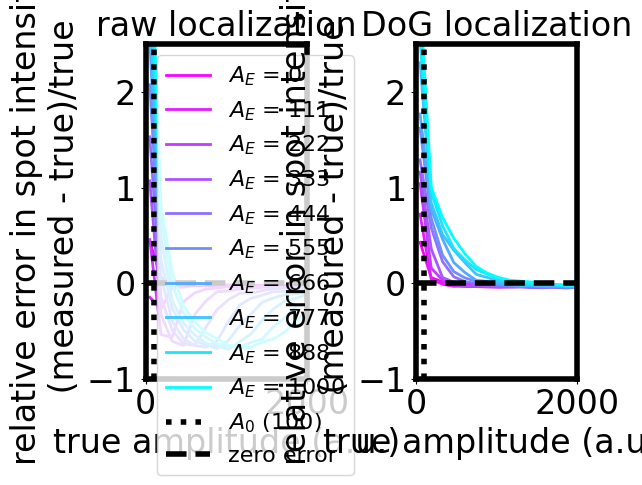

In [10]:


################################# no dog #################################################
with open(data_dir_no_dog + '/measured_inten_arr_10.pkl', 'rb') as file:
    measured_intens = pickle.load(file)

with open(data_dir_no_dog + '/true_inten_arr_10.pkl', 'rb') as file:
    true_intens = pickle.load(file)

with open(data_dir_no_dog + '/shell_means_arr_10.pkl', 'rb') as file:
    shell_means = pickle.load(file)

with open(data_dir_no_dog + '/shell_vars_arr_10.pkl', 'rb') as file:
    shell_vars = pickle.load(file)

error = (measured_intens - true_intens) / true_intens 
mean_error = np.mean(error, axis=2)
std_error = np.mean(error, axis=2)

shell_var_to_mean = np.mean(shell_vars / shell_means, axis=2)
true_signal_to_bkg = np.mean(true_intens, axis=2) / np.mean(shell_means, axis=2) / 251

plt.figure()
plt.subplot(121)
for i in range(error.shape[0]):
    plt.plot(amplitude_arr[0:], mean_error[i,0:], linewidth=2, color=(reds[i], greens[i], blues[i]), label='$A_E$ = ' + str(int(bg_amplitude_arr[i])))

plt.plot(offset * np.ones(5), np.linspace(-1, 3, 5), 'k:', linewidth=4, label='$A_0$ (100)')
plt.plot(np.linspace(0, amplitude_arr[-1], 5), np.zeros(5), 'k--', linewidth=4, label='zero error')
plt.xlabel('true amplitude (a.u.)', fontsize=24)
plt.ylabel('relative error in spot intensity \n (measured - true)/true', fontsize=24)
plt.title('raw localization', fontsize=24)
plt.legend(fontsize=16)
plt.ylim([-1, 2.5])
plt.xlim([0, 2000])
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)



########################################## dog #######################

with open(data_dir_dog + '/measured_inten_arr_10.pkl', 'rb') as file:
    measured_intens = pickle.load(file)

with open(data_dir_dog + '/true_inten_arr_10.pkl', 'rb') as file:
    true_intens = pickle.load(file)

with open(data_dir_dog + '/shell_means_arr_10.pkl', 'rb') as file:
    shell_means = pickle.load(file)

with open(data_dir_dog + '/shell_vars_arr_10.pkl', 'rb') as file:
    shell_vars = pickle.load(file)

error = (measured_intens - true_intens) / true_intens 
# error = (measured_intens - np.repeat(np.expand_dims(true_intens, axis=2), 1000, axis=2)) / np.repeat(np.expand_dims(true_intens, axis=2), 1000, axis=2) 
mean_error = np.mean(error, axis=2)
std_error = np.mean(error, axis=2)

shell_var_to_mean = np.mean(shell_vars / shell_means, axis=2)
true_signal_to_bkg = np.mean(true_intens, axis=2) / np.mean(shell_means, axis=2) / 251

plt.subplot(122)
for i in range(error.shape[0]):
    plt.plot(amplitude_arr[0:], mean_error[i,0:], linewidth=2, color=(reds[i], greens[i], blues[i]), label='$A_E$ = ' + str(int(bg_amplitude_arr[i])))

plt.plot(offset * np.ones(5), np.linspace(-1, 3, 5), 'k:', linewidth=4, label='$A_0$ (100)')
plt.plot(np.linspace(0, amplitude_arr[-1], 5), np.zeros(5), 'k--', linewidth=4, label='zero error')
plt.xlabel('true amplitude (a.u.)', fontsize=24)
plt.ylabel('relative error in spot intensity \n (measured - true)/true', fontsize=24)
plt.title('DoG localization', fontsize=24)
#plt.legend(fontsize=16)
plt.ylim([-1, 2.5])
plt.xlim([0, 2000])
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)

plt.tight_layout(w_pad=-5)

## FigS4C
Plot a heatmap of relative error in total intensity measurement (with localization on DoG images) as a function of signal:background and "structuredness" of background (see FigS4).

In [12]:
"""plot heat map"""
def get_bin(val, bins):
    this_id = np.where(np.abs(val - bins) == np.min(np.abs(val - bins)))[0][0]
    return this_id


<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_947467/2581874899.py:68: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('signal/background ($\\langle I \\rangle/\mu_{shell}$)', fontsize=24)
/tmp/ipykernel_947467/2581874899.py:69: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('structuredness of background ($\sigma^2_{shell}/\mu_{shell}$)', fontsize=24)


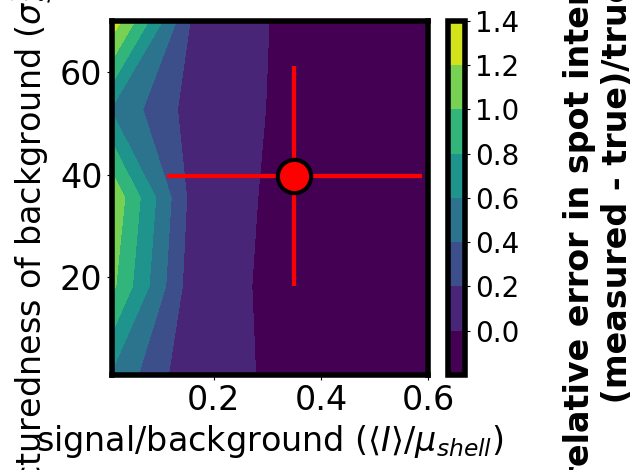

In [16]:
plt.rcParams["text.usetex"]

amplitude_arr = np.linspace(50, 2000, 15)             # sets the SNR (poisson noise)
offset = 100                # sets the uniform background
bg_amplitude_arr = np.linspace(0, 1000, 10)          # sets the amplitude of the random exponential background

"""gauss3d_dog"""
with open(data_dir_dog + r'/measured_inten_arr_10.pkl', 'rb') as file:
    measured_intens = pickle.load(file)

with open(data_dir_dog + r'/true_inten_arr_10.pkl', 'rb') as file:
    true_intens = pickle.load(file)

with open(data_dir_dog + r'/shell_means_arr_10.pkl', 'rb') as file:
    shell_means = pickle.load(file)

with open(data_dir_dog + r'/shell_vars_arr_10.pkl', 'rb') as file:
    shell_vars = pickle.load(file)

error = (measured_intens - true_intens) / true_intens 
mean_error = np.mean(error, axis=2)
std_error = np.mean(error, axis=2)

shell_var_to_mean = np.mean(shell_vars / shell_means, axis=2)
true_signal_to_bkg = np.mean(true_intens, axis=2) / np.mean(shell_means, axis=2) / 251


"""data"""
df = pd.read_pickle(path_to_dataset1)
data_shell_var_to_mean = df.std_offset ** 2 / df.offset
data_signal_to_background = df.gauss3d_dog / 251 / df.offset
data_x_mean = np.mean(data_signal_to_background)
data_x_std = np.std(data_signal_to_background)
data_y_mean = np.mean(data_shell_var_to_mean)
data_y_std = np.std(data_shell_var_to_mean)


num_bins=10
y = shell_var_to_mean 
x = true_signal_to_bkg
z = mean_error
x_bins = np.linspace(0.01, 0.6, 5)
y_bins = np.linspace(1.0, 70.0, 5)
y_bin_ids = np.zeros_like(z)
x_bin_ids = np.zeros_like(z)
for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        this_y_bin = get_bin(y[i,j], y_bins)
        this_x_bin = get_bin(x[i,j], x_bins)
        y_bin_ids[i, j] = this_y_bin
        x_bin_ids[i, j] = this_x_bin

final_error_arr = np.zeros((len(y_bins), len(x_bins)))
for i in range(len(y_bins)):
    for j in range(len(x_bins)):
        these_elements = mean_error[np.array(y_bin_ids==i) * np.array(x_bin_ids==j)]
        final_error_arr[i, j] = np.mean(these_elements)
        

plt.figure()
plt.contourf(x_bins, y_bins, final_error_arr, vmin=-0.05)
cbar = plt.colorbar(ticks=(0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4))
plt.clim(-0.05, 1.4 )
cbar.ax.tick_params(labelsize=20)
cbar.set_label(label='\n relative error in spot intensity \n (measured - true)/true', size=24, weight='bold')
plt.errorbar(data_x_mean, data_y_mean, yerr=data_y_std, xerr=data_x_std, linewidth=3, color='r')
plt.plot(data_x_mean, data_y_mean, 'ko', markersize=24, markerfacecolor='r', markeredgewidth=3)
plt.xlabel('signal/background ($\\langle I \\rangle/\mu_{shell}$)', fontsize=24)
plt.ylabel('structuredness of background ($\sigma^2_{shell}/\mu_{shell}$)', fontsize=24)

# style
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    
plt.tight_layout()
